# Making a network

For this class most of the types of network you will want to make can be produced by _metaknowledge_. The first three co-citation network, citation network and co-author network are specialized versions of the last three one-mode network, two-mode network and multi-mode network.

First we need to import metaknowledge and because we will be dealing with graphs the graphs package _networkx_ as should be imported


In [1]:
import metaknowledge as mk
import networkx as nx

And so we can visualize the graphs


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import metaknowledge.contour.plotting as mkv

Before we start we should also get a `RecordCollection` to work with.


In [4]:
RC = mk.RecordCollection('../savedrecs.txt')

Now lets look at the different types of graph.

# Making a co-citation network

To make a basic co-citation network of Records use `networkCoCitation()`.


In [6]:
coCites = RC.networkCoCitation()
print(mk.graphStats(coCites, makeString = True)) #makestring by default is True so it is not strictly necessary to include

Nodes: 571
Edges: 17663
Isolates: 0
Self loops: 25
Density: 0.108538
Transitivity: 0.684276


[`graphStats()`](http://networkslab.org/metaknowledge/docs/metaknowledge#graphStats) is a function to extract some of the statists of a graph and make them into a nice string.


All the graphs _metaknowledge_ use are _networkx_ graphs, a few functions to trim them are implemented in _metaknowledge_, [here](#filtering-graphs) is the example section, but many useful functions are implemented by it. Read the documentation [here](https://networkx.github.io/documentation/networkx-1.9.1/) for more information.

The `networkCoCitation()` function has many options for filtering and determining the nodes. The default is to use the `Citations` themselves. If you wanted to make a network of co-citations of journals you would have to make the node type `'journal'` and remove the non-journals.


In [10]:
coCiteJournals = RC.networkCoCitation(nodeType = 'journal', dropNonJournals = True)
print(mk.graphStats(coCiteJournals))

Nodes: 91
Edges: 1414
Isolates: 0
Self loops: 41
Density: 0.345299
Transitivity: 0.633057


Lets take a look at the graph after a quick spring layout


C:\Users\tcrick\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


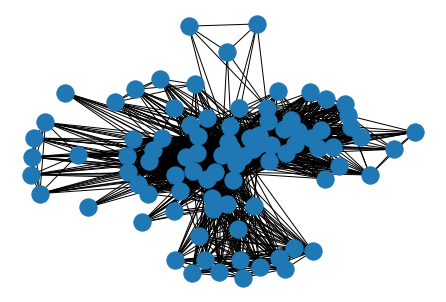

In [11]:
nx.draw_spring(coCiteJournals)

A bit basic but gives a general idea. If you want to make a much better looking and more informative visualization you could try [gephi](https://gephi.github.io/) or [visone](http://visone.info/). Exporting to them is covered below in [**Exporting graphs**](#exporting-graphs).

# Making a citation network

The `networkCitation` method is nearly identical to `networkCoCitation` in its parameters. It has one additional keyword argument `directed` that controls if it produces a directed network.

One small example is still worth providing. If you want to make a network of the citations of years by other years and have the letter `'A'` in them then you would write:


In [14]:
citationsA = RC.networkCitation(nodeType = 'year', keyWords = ['A'])
print(mk.graphStats(citationsA))

Nodes: 18
Edges: 24
Isolates: 0
Self loops: 1
Density: 0.0784314
Transitivity: 0.0344828


C:\Users\tcrick\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


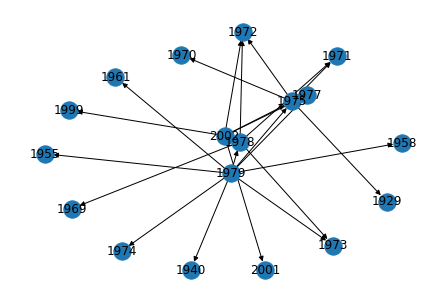

In [15]:
nx.draw_spring(citationsA, with_labels = True)

# Making a co-author network

The [`coAuthNetwork()`](http://networkslab.org/metaknowledge/docs/RecordCollection#coAuthNetwork) function produces the co-authorship network of the RecordCollection as is used as shown


In [35]:
coAuths = RC.networkCoAuthor()
print(mk.graphStats(coAuths))

Nodes: 45
Edges: 46
Isolates: 9
Self loops: 0
Density: 0.0464646
Transitivity: 0.822581


# Post processing graphs

If you wish to apply a well known algorithm or process to a graph [_networkx_](https://networkx.github.io/documentation/networkx-1.9.1/) is a good place to look as they do a good job at implementing  them.

One of the features it lacks though is pruning of graphs, _metaknowledge_ has these capabilities. To remove edges outside of some weight range, use `dropEdges()`. For example if you wish to remove the self loops, edges with weight less than 2 and weight higher than 10 from `coAuths`.


In [36]:
minWeight = 2
maxWeight = 10
mk.dropEdges(coAuths, minWeight, maxWeight, dropSelfLoops = True)
print(mk.graphStats(coAuths))

Nodes: 45
Edges: 10
Isolates: 36
Self loops: 0
Density: 0.010101
Transitivity: 1


Then to remove all the isolates, i.e. nodes with degree less than 1, use `dropNodesByDegree()`


In [38]:
mk.dropNodesByDegree(coAuths, 1)
print(mk.graphStats(coAuths))

Nodes: 9
Edges: 10
Isolates: 0
Self loops: 0
Density: 0.277778
Transitivity: 1


After the processing it looks like


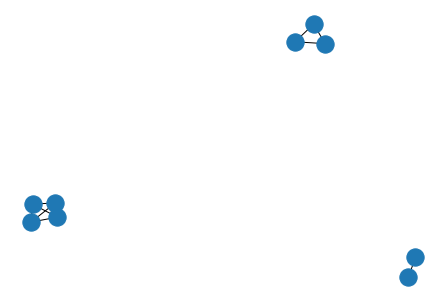

In [39]:
nx.draw_spring(coAuths)

Hm, it looks a bit thinner. Using a visualizer will make the difference a bit more noticeable.

#Exporting graphs

Now you have a graph the last step is to write it to disk. _networkx_ has a few ways of doing this, but they tend to be slow. _metaknowledge_ can write an edge list and node attribute file that contain all the information of the graph. The function to do this is called `writeGraph()`. You give it the start of the file name and it makes two labeled files containing the graph.

In [40]:
mk.writeGraph(coAuths, "FinalJournalCoCites")

These files are simple CSVs an can be read easily by most systems. If you want to read them back into Python the `readGraph()` function will do that.


In [41]:
FinalJournalCoCites = mk.readGraph("FinalJournalCoCites_edgeList.csv", "FinalJournalCoCites_nodeAttributes.csv")
print(mk.graphStats(FinalJournalCoCites))

Nodes: 9
Edges: 10
Isolates: 0
Self loops: 0
Density: 0.277778
Transitivity: 1


This is full example workflow for _metaknowledge_, the package is flexible and you hopefully will be able to customize it to do what you want (I assume you do not want the Records staring with 'A').